In [29]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Input, Attention, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [20]:
# Load the dataset
file_path = '/home/disi/ff/Datasets/Dataset_1/forcasting.csv'  # Update with the path to your CSV file
data = pd.read_csv(file_path)

In [21]:
# Selecting relevant columns
dataset = data[['humidity (%)', 'temperature (DegCel)', 'light intensity']].values



In [22]:
# Normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [23]:
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data)-sequence_length):
        x = data[i:(i+sequence_length), :]
        y = data[i+sequence_length, :]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Creating sequences
SEQUENCE_LENGTH = 5  # You can modify this value
X, y = create_sequences(scaled_data, SEQUENCE_LENGTH)

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# LSTM model with Attention Layer
input_layer = Input(shape=(SEQUENCE_LENGTH, X.shape[2]))
lstm_layer = LSTM(50, return_sequences=True)(input_layer)
attention_layer = Attention()([lstm_layer, lstm_layer])
flattened_layer = Flatten()(attention_layer)
dense_layer = Dense(64, activation='relu')(flattened_layer)
output_layer = Dense(3, activation='sigmoid')(dense_layer)  # Output layer with 3 neurons

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 5, 3)]               0         []                            
                                                                                                  
 lstm_3 (LSTM)               (None, 5, 50)                10800     ['input_4[0][0]']             
                                                                                                  
 attention_3 (Attention)     (None, 5, 50)                0         ['lstm_3[0][0]',              
                                                                     'lstm_3[0][0]']              
                                                                                                  
 flatten_3 (Flatten)         (None, 250)                  0         ['attention_3[0][0]']   

In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10


W0000 00:00:1702896497.253018   51000 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


190/190 [==============================] - 2s 4ms/step - loss: 6.1063e-04 - val_loss: 6.1946e-04
Epoch 2/10
190/190 [==============================] - 1s 4ms/step - loss: 5.6399e-04 - val_loss: 5.4365e-04
Epoch 3/10
190/190 [==============================] - 1s 4ms/step - loss: 5.3930e-04 - val_loss: 5.8883e-04
Epoch 4/10
190/190 [==============================] - 1s 3ms/step - loss: 5.2199e-04 - val_loss: 4.8233e-04
Epoch 5/10
190/190 [==============================] - 1s 3ms/step - loss: 4.8163e-04 - val_loss: 4.8823e-04
Epoch 6/10
190/190 [==============================] - 1s 3ms/step - loss: 4.8294e-04 - val_loss: 4.4632e-04
Epoch 7/10
190/190 [==============================] - 1s 4ms/step - loss: 4.8561e-04 - val_loss: 4.2505e-04
Epoch 8/10
190/190 [==============================] - 1s 3ms/step - loss: 4.4725e-04 - val_loss: 4.3426e-04
Epoch 9/10
190/190 [==============================] - 1s 4ms/step - loss: 4.0105e-04 - val_loss: 7.0858e-04
Epoch 10/10
190/190 [==================

In [32]:
# Save the model
model.save('lstm_attention_model.h5')

/home/disi/anaconda3/envs/ff/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
# Load the model
model = load_model('/home/disi/ff/lstm_attention_model.h5')

# Model Evaluation
evaluation = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Loss: {evaluation}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

48/48 [==============================] - 0s 2ms/step - loss: 3.5751e-04


W0000 00:00:1702896513.124715   51000 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


48/48 [==============================] - 0s 2ms/step
Loss: 0.00035751270479522645
Mean Absolute Error (MAE): 0.010951039067579653
Root Mean Squared Error (RMSE): 0.01890800509105321
Mean Absolute Percentage Error (MAPE): 344334657138.1888


W0000 00:00:1702896513.599658   51000 op_level_cost_estimator.cc:699] Error in PredictCost() for the op: op: "Softmax" attr { key: "T" value { type: DT_FLOAT } } inputs { dtype: DT_FLOAT shape { unknown_rank: true } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2593 num_cores: 6 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.90" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 36700160 memory_size: 268435456 } outputs { dtype: DT_FLOAT shape { unknown_rank: true } }


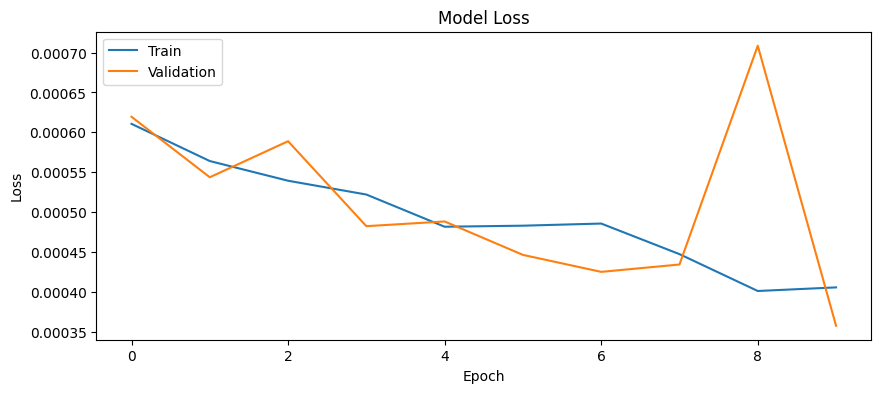

In [34]:
# Plotting training loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

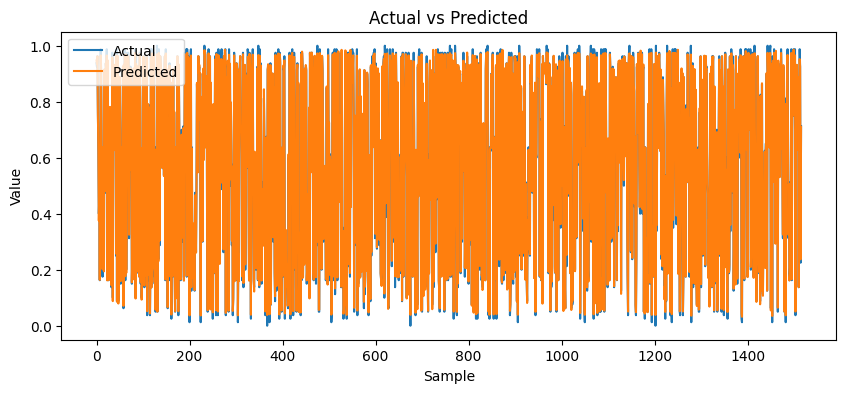

In [35]:
# Selecting a feature index (e.g., 0 for the first feature)
feature_index = 0

plt.figure(figsize=(10, 4))
plt.plot(y_test[:, feature_index], label='Actual')
plt.plot(predictions[:, feature_index], label='Predicted')
plt.title('Actual vs Predicted')
plt.ylabel('Value')
plt.xlabel('Sample')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()